In [14]:
!pip install -q wfdb
!pip install -q neurokit2
!pip install -q biosppy
!pip install vitaldb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import numpy as np
import wfdb
import neurokit2 as nk
import matplotlib.pyplot as plt
import os
import pandas as pd
import biosppy.signals.ecg as ecg
import random
from tqdm.notebook import tqdm
import vitaldb

In [43]:


vals = vitaldb.load_case(34, ['ECG_II','ART'], 1/100)
signal = vals[:,0][np.logical_not(np.isnan(vals[:,0]))]

In [44]:
signal = np.array(signal).flatten()
signal_clean = nk.ecg_clean(signal, sampling_rate=500)

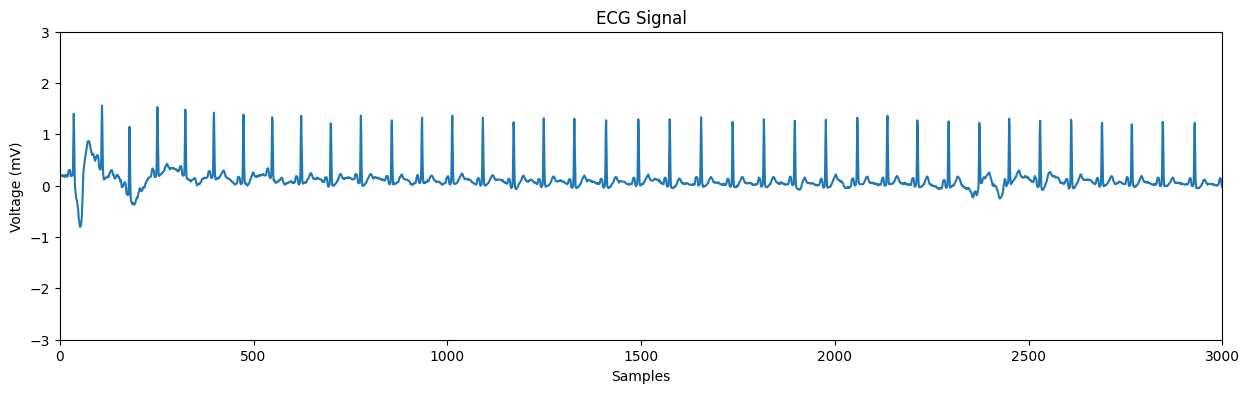

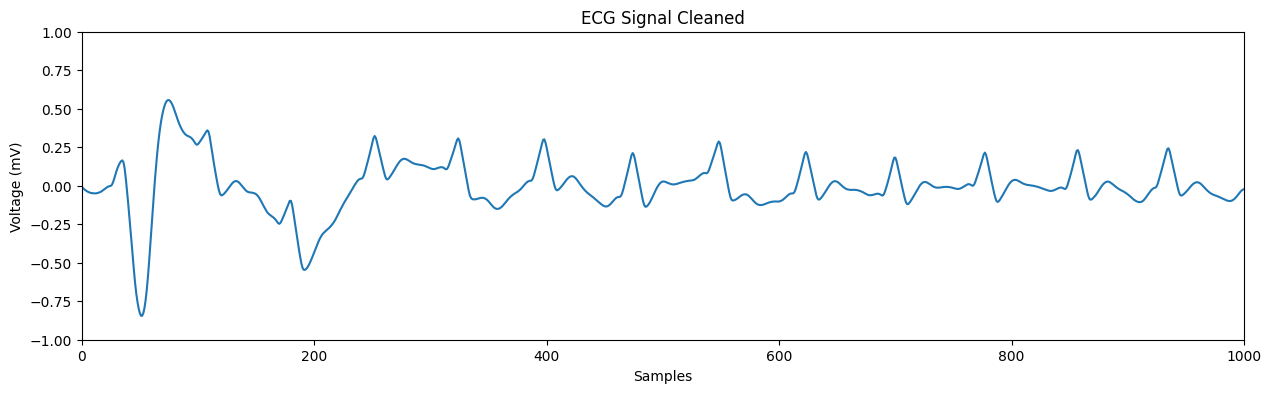

In [45]:
plt.figure(figsize=(15, 4))
plt.plot(signal)
plt.xlabel('Samples')
plt.ylabel('Voltage (mV)')
plt.title('ECG Signal')
plt.xlim( 0 , 3000)
plt.ylim( -3 , 3)
plt.show()

plt.figure(figsize=(15, 4))
plt.plot(signal_clean)
plt.xlabel('Samples')
plt.ylabel('Voltage (mV)')
plt.title('ECG Signal Cleaned')
plt.xlim( 0 , 1000)
plt.ylim( -1 , 1)
plt.show()

In [46]:
features, _ = nk.ecg_process(signal, sampling_rate=1000)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


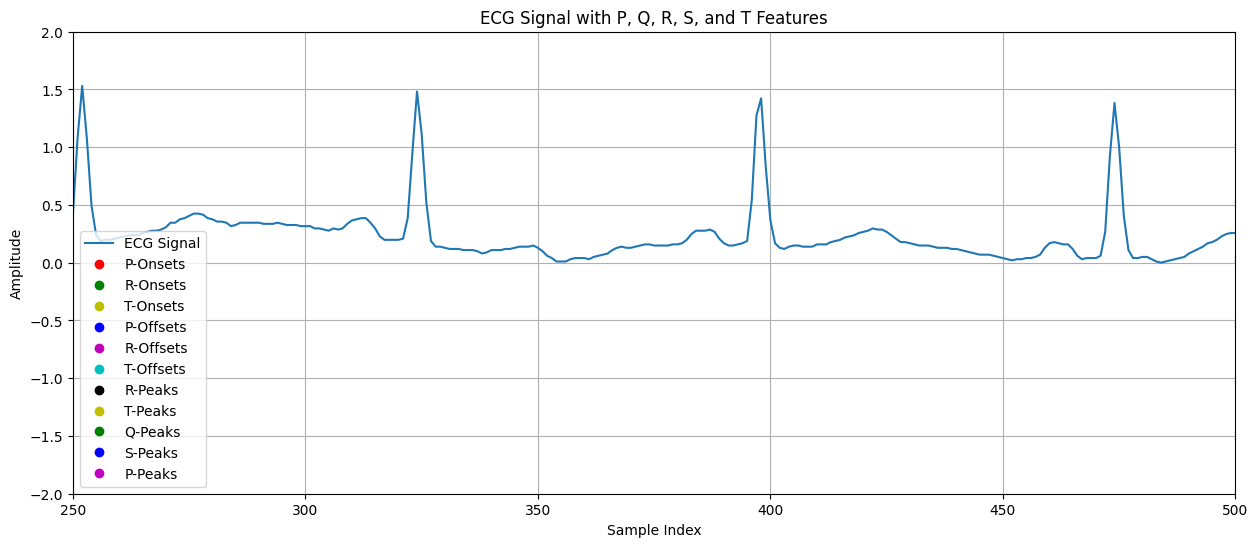

In [37]:
p_onsets = features["ECG_P_Onsets"]
r_onsets = features["ECG_R_Onsets"]
t_onsets = features["ECG_T_Onsets"]
p_offsets = features["ECG_P_Offsets"]
r_offsets = features["ECG_R_Offsets"]
t_offsets = features["ECG_T_Offsets"]
r_peaks = features["ECG_R_Peaks"]
t_peaks = features["ECG_T_Peaks"]
q_peaks = features["ECG_Q_Peaks"]
s_peaks = features["ECG_S_Peaks"]
p_peaks = features["ECG_P_Peaks"]
heart_rate = features["ECG_Rate"]

# signal_clean = signal_clean[:100000]
plt.figure(figsize=(15, 6))
plt.plot(signal, label="ECG Signal")
samples = np.arange(len(signal))

p_onsets_mask = p_onsets == 1
p_onsets_idx = samples[p_onsets_mask]
plt.plot(samples[p_onsets_mask], signal[p_onsets_mask], 'ro', label="P-Onsets")

r_onsets_mask = r_onsets == 1
r_onsets_idx = samples[r_onsets_mask]
plt.plot(samples[r_onsets_mask], signal[r_onsets_mask], 'go', label="R-Onsets")

t_onsets_mask = t_onsets == 1
t_onsets_idx = samples[t_onsets_mask]
plt.plot(samples[t_onsets_mask], signal[t_onsets_mask], 'yo', label="T-Onsets")

p_offsets_mask = p_offsets == 1
p_offsets_idx = samples[p_offsets_mask]
plt.plot(samples[p_offsets_mask], signal[p_offsets_mask], 'bo', label="P-Offsets")

r_offsets_mask = r_offsets == 1
r_offsets_idx = samples[r_offsets_mask]
plt.plot(samples[r_offsets_mask], signal[r_offsets_mask], 'mo', label="R-Offsets")

t_offsets_mask = t_offsets == 1
t_offsets_idx = samples[t_offsets_mask]
plt.plot(samples[t_offsets_mask], signal[t_offsets_mask], 'co', label="T-Offsets")

r_peaks_mask = r_peaks == 1
r_peaks_idx = samples[r_peaks_mask]
plt.plot(samples[r_peaks_mask], signal[r_peaks_mask], 'ko', label="R-Peaks")

t_peaks_mask = t_peaks == 1
t_peaks_idx = samples[t_peaks_mask]
plt.plot(samples[t_peaks_mask], signal[t_peaks_mask], 'yo', label="T-Peaks")

q_peaks_mask = q_peaks == 1
q_peaks_idx = samples[q_peaks_mask]
plt.plot(samples[q_peaks_mask], signal[q_peaks_mask], 'go', label="Q-Peaks")

s_peaks_mask = s_peaks == 1
s_peaks_idx = samples[s_peaks_mask]
plt.plot(samples[s_peaks_mask], signal[s_peaks_mask], 'bo', label="S-Peaks")

p_peaks_mask = p_peaks == 1
p_peaks_idx = samples[p_peaks_mask]
plt.plot(samples[p_peaks_mask], signal[p_peaks_mask], 'mo', label="P-Peaks")

plt.legend()
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.title("ECG Signal with P, Q, R, S, and T Features")
plt.grid()

plt.xlim(250, 500)
plt.ylim(-2, 2)
plt.show()



---



---

